In [1]:
import sys
sys.path.insert(0,"/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/src")

In [2]:
from models.models import *
from models.dynamic_algorithms import *
from evaluation.evals import *
from sklearn.metrics import accuracy_score
from evaluation.evaluate_models import *
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Run and evaluate the proposed algorithms

In [4]:
def runModels(train_nodes, test_nodes):
    # Run Non-distibuted theoretical optimal
    # combine all traning data into one dataframe
    trainData = pd.concat(train_nodes)
    # train a random forest on trainData
    clf = sourceRFModel(trainData)
    # predict the labels of node3
    y_pred = predictTarNode(clf, test_nodes[0])
    # calculate the accuracy of the prediction
    res1 = accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)
    # print("Non-distributed Theoretical Optimal: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # Run Distributed Theoretical Optimal
    # Run gridsearch to find the best combination of node weights and class weights

    # Dynamic Algorithm

    # Using binary class distribution to find node weights

    # without class weights
    node_weights = calculate_node_weights(train_nodes)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res2 = accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)
    # print("Binary class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with class weights
    node_weights = calculate_node_weights(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res3 = accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)
    # print("Binary class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with a threshold of 0.1 for class weights
    node_weights = calculate_node_weights(train_nodes)
    class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res4  = accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)
    # print("Binary class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # using class distribution with frequencies to find node weights

    # without class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res5 = accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)
    # print("Frequency class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res6 = accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)
    # print("Frequency class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with a threshold of 0.1 for class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res7 = accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)
    # print("Frequency class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # graph approach with binary occurence
    G = fcngraph_from_nodes(train_nodes)
    node_weights = graph_node_weights(G)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res8 = accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

    return [res1, res2, res3, res4, res5, res6, res7, res8]

In [5]:
def runModelsRecall(train_nodes, test_nodes):
    # Run Non-distibuted theoretical optimal
    # combine all traning data into one dataframe
    trainData = pd.concat(train_nodes)
    # train a random forest on trainData
    clf = sourceRFModel(trainData)
    # predict the labels of node3
    y_pred = predictTarNode(clf, test_nodes[0])
    # calculate the accuracy of the prediction
    res1 = recall_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Non-distributed Theoretical Optimal: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # Run Distributed Theoretical Optimal
    # Run gridsearch to find the best combination of node weights and class weights

    # Dynamic Algorithm

    # Using binary class distribution to find node weights

    # without class weights
    node_weights = calculate_node_weights(train_nodes)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res2 = recall_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Binary class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with class weights
    node_weights = calculate_node_weights(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res3 = recall_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Binary class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with a threshold of 0.1 for class weights
    node_weights = calculate_node_weights(train_nodes)
    class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res4  = recall_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Binary class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # using class distribution with frequencies to find node weights

    # without class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res5 = recall_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Frequency class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res6 = recall_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Frequency class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with a threshold of 0.1 for class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res7 = recall_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Frequency class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # graph approach with binary occurence
    G = fcngraph_from_nodes(train_nodes)
    node_weights = graph_node_weights(G)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res8 = recall_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')

    return [res1, res2, res3, res4, res5, res6, res7, res8]

In [6]:
def runModelsf1(train_nodes, test_nodes):
    # Run Non-distibuted theoretical optimal
    # combine all traning data into one dataframe
    trainData = pd.concat(train_nodes)
    # train a random forest on trainData
    clf = sourceRFModel(trainData)
    # predict the labels of node3
    y_pred = predictTarNode(clf, test_nodes[0])
    # calculate the accuracy of the prediction
    res1 = f1_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Non-distributed Theoretical Optimal: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # Run Distributed Theoretical Optimal
    # Run gridsearch to find the best combination of node weights and class weights

    # Dynamic Algorithm

    # Using binary class distribution to find node weights

    # without class weights
    node_weights = calculate_node_weights(train_nodes)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res2 = f1_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Binary class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with class weights
    node_weights = calculate_node_weights(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res3 = f1_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Binary class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with a threshold of 0.1 for class weights
    node_weights = calculate_node_weights(train_nodes)
    class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res4  = f1_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Binary class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # using class distribution with frequencies to find node weights

    # without class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res5 = f1_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Frequency class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res6 = f1_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Frequency class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with a threshold of 0.1 for class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res7 = f1_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')
    # print("Frequency class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # graph approach with binary occurence
    G = fcngraph_from_nodes(train_nodes)
    node_weights = graph_node_weights(G)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res8 = f1_score(test_nodes[0]['data_sensitivity'], y_pred, average='macro')

    return [res1, res2, res3, res4, res5, res6, res7, res8]

In [7]:
def runModelsRocAuc(train_nodes, test_nodes):
    # Run Non-distibuted theoretical optimal
    # combine all traning data into one dataframe
    trainData = pd.concat(train_nodes)
    # train a random forest on trainData
    clf = sourceRFModel(trainData)
    # find y_score using predict_proba
    y_score = clf.predict_proba(test_nodes[0].drop(['data_sensitivity'], axis=1))
    # calculate the roc_auc_score of the prediction
    res1 = roc_auc_score(test_nodes[0]['data_sensitivity'], y_score, average='macro', multi_class='ovo')

    # without class weights
    node_weights = calculate_node_weights(train_nodes)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_score
    y_score = weightedVoting(sourceModels, test_nodes[0], node_weights, return_proba=True)
    # calculate the roc_auc_score of the prediction
    res2 = roc_auc_score(test_nodes[0]['data_sensitivity'], y_score, average='macro', multi_class='ovo')

    # with class weights
    node_weights = calculate_node_weights(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_score
    y_score = weightedVoting(sourceModels, test_nodes[0], node_weights, return_proba=True)
    # calculate the roc_auc_score of the prediction
    res3 = roc_auc_score(test_nodes[0]['data_sensitivity'], y_score, average='macro', multi_class='ovo')

    # with a threshold of 0.1 for class weights
    node_weights = calculate_node_weights(train_nodes)
    class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_score
    y_score = weightedVoting(sourceModels, test_nodes[0], node_weights, return_proba=True)
    # calculate the roc_auc_score of the prediction
    res4 = roc_auc_score(test_nodes[0]['data_sensitivity'], y_score, average='macro', multi_class='ovo')

     # without class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_score
    y_score = weightedVoting(sourceModels, test_nodes[0], node_weights, return_proba=True)
    # calculate the roc_auc_score of the prediction
    res5 = roc_auc_score(test_nodes[0]['data_sensitivity'], y_score, average='macro', multi_class='ovo')

    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_score
    y_score = weightedVoting(sourceModels, test_nodes[0], node_weights, return_proba=True)
    # calculate the roc_auc_score of the prediction
    res6 = roc_auc_score(test_nodes[0]['data_sensitivity'], y_score, average='macro', multi_class='ovo')

     # with a threshold of 0.1 for class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_score
    y_score = weightedVoting(sourceModels, test_nodes[0], node_weights, return_proba=True)
    # calculate the roc_auc_score of the prediction
    res7 = roc_auc_score(test_nodes[0]['data_sensitivity'], y_score, average='macro', multi_class='ovo')

    G = fcngraph_from_nodes(train_nodes)
    node_weights = graph_node_weights(G)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_score
    y_score = weightedVoting(sourceModels, test_nodes[0], node_weights, return_proba=True)
    # add equal number to each row of y_score to make sure each row sums to 1
    y_score = y_score + (1 - y_score.sum(axis=1, keepdims=True))/len(y_score[0])
    # calculate the roc_auc_score of the prediction
    res8 = roc_auc_score(test_nodes[0]['data_sensitivity'], y_score, average='macro', multi_class='ovo')
    
    return [res1, res2, res3, res4, res5, res6, res7, res8]
    

## Scenario 1

In [8]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_1/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_1/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_1/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_1/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)

### Non-distributed Theoretical Optimal

In [5]:
# combine all traning data into one dataframe
trainData = pd.concat(train_nodes)
# train a random forest on trainData
clf = sourceRFModel(trainData)
# predict the labels of node3
y_pred = predictTarNode(clf, node3_testing)
# calculate the accuracy of the prediction
accuracy_score(node3_testing['data_sensitivity'], y_pred)

0.9840459476707084

### Distributed Theoretical Optimal

In [6]:
# Run gridsearch to find the best combination of node weights and class weights

### Dynamic Algorithm

#### Using binary class distribution to find node weights

##### without class weights

In [7]:
node_weights = calculate_node_weights(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.8021697511167837

##### with class weights

In [8]:
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.8270580727504786

In [9]:
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.8519463943841736

#### Using class distribution with frequencies to find node weights

##### without class weights

In [10]:
node_weights = calculate_node_weights_with_frequencies(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.797702616464582

##### with class weights

In [11]:
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.8021697511167837

In [12]:
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.7945118059987237

## Scenario 2

In [13]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_2/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_2/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_2/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_2/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)

### Non-distributed Theoretical Optimal

In [14]:
# combine all traning data into one dataframe
trainData = pd.concat(train_nodes)
# train a random forest on trainData
clf = sourceRFModel(trainData)
# predict the labels of node3
y_pred = predictTarNode(clf, node3_testing)
# calculate the accuracy of the prediction
accuracy_score(node3_testing['data_sensitivity'], y_pred)

0.98875

### Distributed Theoretical Optimal

In [15]:
# Run gridsearch to find the best combination of node weights and class weights

### Dynamic Algorithm

#### Using binary class distribution to find node weights

##### without class weights

In [16]:
node_weights = calculate_node_weights(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.125

##### with class weights

In [17]:
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.125

#### Using class distribution with frequencies to find node weights

##### without class weights

In [18]:
node_weights = calculate_node_weights_with_frequencies(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.5

##### with class weights

In [19]:
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.5

## Scenario 3

In [20]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_3/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_3/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_3/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_3/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)

### Non-distributed Theoretical Optimal

In [21]:
# combine all traning data into one dataframe
trainData = pd.concat(train_nodes)
# train a random forest on trainData
clf = sourceRFModel(trainData)
# predict the labels of node3
y_pred = predictTarNode(clf, node3_testing)
# calculate the accuracy of the prediction
accuracy_score(node3_testing['data_sensitivity'], y_pred)

0.9800995024875622

### Distributed Theoretical Optimal

In [22]:
# Run gridsearch to find the best combination of node weights and class weights

### Dynamic Algorithm

#### Using binary class distribution to find node weights

##### without class weights

In [23]:
node_weights = calculate_node_weights(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.9796019900497512

##### with class weights

In [24]:
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.9796019900497512

In [25]:
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.9796019900497512

#### Using class distribution with frequencies to find node weights

##### without class weights

In [26]:
node_weights = calculate_node_weights_with_frequencies(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.9796019900497512

##### with class weights

In [27]:
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.9796019900497512

In [28]:
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)

0.9796019900497512

## Scenario 4

In [12]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_4/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_4/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_4/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_4/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)

In [13]:
# Run Non-distibuted theoretical optimal
# combine all traning data into one dataframe
trainData = pd.concat(train_nodes)
# train a random forest on trainData
clf = sourceRFModel(trainData)
# predict the labels of node3
y_pred = predictTarNode(clf, test_nodes[0])
# calculate the accuracy of the prediction
print("Non-distributed Theoretical Optimal: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# Run Distributed Theoretical Optimal
# Run gridsearch to find the best combination of node weights and class weights

# Dynamic Algorithm

# Using binary class distribution to find node weights

# without class weights
node_weights = calculate_node_weights(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Binary class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with class weights
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Binary class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with a threshold of 0.1 for class weights
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Binary class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# using class distribution with frequencies to find node weights

# without class weights
node_weights = calculate_node_weights_with_frequencies(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Frequency class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with class weights
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Frequency class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with a threshold of 0.1 for class weights
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Frequency class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

Non-distributed Theoretical Optimal:  0.9831565814098565
Binary class distribution without class weights:  0.982532751091703
Binary class distribution with class weights:  0.98378041172801
Binary class distribution with class weights and 0.1 threshold:  0.98378041172801
Frequency class distribution without class weights:  0.982532751091703
Frequency class distribution with class weights:  0.98378041172801
Frequency class distribution with class weights and 0.1 threshold:  0.98378041172801


## Scenario 5

In [14]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_5/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_5/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_5/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_5/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)

In [15]:
# Run Non-distibuted theoretical optimal
# combine all traning data into one dataframe
trainData = pd.concat(train_nodes)
# train a random forest on trainData
clf = sourceRFModel(trainData)
# predict the labels of node3
y_pred = predictTarNode(clf, test_nodes[0])
# calculate the accuracy of the prediction
print("Non-distributed Theoretical Optimal: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# Run Distributed Theoretical Optimal
# Run gridsearch to find the best combination of node weights and class weights

# Dynamic Algorithm

# Using binary class distribution to find node weights

# without class weights
node_weights = calculate_node_weights(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Binary class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with class weights
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Binary class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with a threshold of 0.1 for class weights
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Binary class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# using class distribution with frequencies to find node weights

# without class weights
node_weights = calculate_node_weights_with_frequencies(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Frequency class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with class weights
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Frequency class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with a threshold of 0.1 for class weights
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Frequency class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

Non-distributed Theoretical Optimal:  0.9836512261580381
Binary class distribution without class weights:  0.9754768392370572
Binary class distribution with class weights:  0.978882833787466
Binary class distribution with class weights and 0.1 threshold:  0.978882833787466
Frequency class distribution without class weights:  0.9829700272479565
Frequency class distribution with class weights:  0.9822888283378747
Frequency class distribution with class weights and 0.1 threshold:  0.9822888283378747


## Scenario 6

In [17]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Train/node2.csv')
node3 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Train/node3.csv')
node4_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Train/node4.csv')
node4_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Test/node4.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3)
train_nodes.append(node4_training)
test_nodes.append(node3_testing)

In [18]:
# Run Non-distibuted theoretical optimal
# combine all traning data into one dataframe
trainData = pd.concat(train_nodes)
# train a random forest on trainData
clf = sourceRFModel(trainData)
# predict the labels of node3
y_pred = predictTarNode(clf, test_nodes[0])
# calculate the accuracy of the prediction
print("Non-distributed Theoretical Optimal: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# Run Distributed Theoretical Optimal
# Run gridsearch to find the best combination of node weights and class weights

# Dynamic Algorithm

# Using binary class distribution to find node weights

# without class weights
node_weights = calculate_node_weights(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Binary class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with class weights
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Binary class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with a threshold of 0.1 for class weights
node_weights = calculate_node_weights(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Binary class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# using class distribution with frequencies to find node weights

# without class weights
node_weights = calculate_node_weights_with_frequencies(train_nodes)
# train source models for each node in train_nodes
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceRFModel(train_nodes[i]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Frequency class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with class weights
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Frequency class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

# with a threshold of 0.1 for class weights
node_weights = calculate_node_weights_with_frequencies(train_nodes)
class_weights = calculate_class_weights(train_nodes, threshold=0.1)
# train source models for each node in train_nodes using sourceModelAdjWeight
sourceModels = []
for i in range(len(train_nodes)):
    sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
# find y_pred using weightedVoting
y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
# calculate the accuracy of the prediction
print("Frequency class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

Non-distributed Theoretical Optimal:  0.9843324250681199
Binary class distribution without class weights:  0.9836512261580381
Binary class distribution with class weights:  0.9836512261580381
Binary class distribution with class weights and 0.1 threshold:  0.9836512261580381
Frequency class distribution without class weights:  0.9836512261580381
Frequency class distribution with class weights:  0.9836512261580381
Frequency class distribution with class weights and 0.1 threshold:  0.9836512261580381


## Get Results

In [8]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_1/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_1/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_1/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_1/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)
result1 = runModels(train_nodes, test_nodes)
result1Recall = runModelsRecall(train_nodes, test_nodes)
result1f1 = runModelsf1(train_nodes, test_nodes)
result1roc = runModelsRocAuc(train_nodes, test_nodes)

KeyError: 'activityID'

In [10]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_2/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_2/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_2/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_2/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)
result2 = runModels(train_nodes, test_nodes)
result2Recall = runModelsRecall(train_nodes, test_nodes)
result2f1 = runModelsf1(train_nodes, test_nodes)
result2roc = runModelsRocAuc(train_nodes, test_nodes)

In [11]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_3/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_3/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_3/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_3/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)
result3 = runModels(train_nodes, test_nodes)
result3Recall = runModelsRecall(train_nodes, test_nodes)
result3f1 = runModelsf1(train_nodes, test_nodes)
result3roc = runModelsRocAuc(train_nodes, test_nodes)

In [12]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_4/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_4/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_4/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_4/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)
result4 = runModels(train_nodes, test_nodes)
result4Recall = runModelsRecall(train_nodes, test_nodes)
result4f1 = runModelsf1(train_nodes, test_nodes)
result4roc = runModelsRocAuc(train_nodes, test_nodes)

In [13]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_5/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_5/Train/node2.csv')
node3_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_5/Train/node3.csv')
node3_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_5/Test/node3.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3_training)
test_nodes.append(node3_testing)
result5 = runModels(train_nodes, test_nodes)
result5Recall = runModelsRecall(train_nodes, test_nodes)
result5f1 = runModelsf1(train_nodes, test_nodes)
result5roc = runModelsRocAuc(train_nodes, test_nodes)

In [14]:
# import the data
train_nodes = []
test_nodes = []
node1 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Train/node1.csv')
node2 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Train/node2.csv')
node3 = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Train/node3.csv')
node4_training = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Train/node4.csv')
node4_testing = pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/scenario_6/Test/node4.csv')
train_nodes.append(node1)
train_nodes.append(node2)
train_nodes.append(node3)
train_nodes.append(node4_training)
test_nodes.append(node3_testing)
result6 = runModels(train_nodes, test_nodes) 
result6Recall = runModelsRecall(train_nodes, test_nodes)
result6f1 = runModelsf1(train_nodes, test_nodes)
result6roc = runModelsRocAuc(train_nodes, test_nodes)

In [15]:
# from each result, drop indices 3 and 6
result1.pop(3)
result1.pop(5)
result2.pop(3)
result2.pop(5)
result3.pop(3)
result3.pop(5)
result4.pop(3)
result4.pop(5)
result5.pop(3)
result5.pop(5)
result6.pop(3)
result6.pop(5)

0.9836512261580381

In [16]:
result1Recall.pop(3)
result1Recall.pop(5)
result2Recall.pop(3)
result2Recall.pop(5)
result3Recall.pop(3)
result3Recall.pop(5)
result4Recall.pop(3)
result4Recall.pop(5)
result5Recall.pop(3)
result5Recall.pop(5)
result6Recall.pop(3)
result6Recall.pop(5)

0.9868390804597702

In [17]:
result1f1.pop(3)
result1f1.pop(5)
result2f1.pop(3)
result2f1.pop(5)
result3f1.pop(3)
result3f1.pop(5)
result4f1.pop(3)
result4f1.pop(5)
result5f1.pop(3)
result5f1.pop(5)
result6f1.pop(3)
result6f1.pop(5)

0.9867913394143324

In [18]:
result1roc.pop(3)
result1roc.pop(5)
result2roc.pop(3)
result2roc.pop(5)
result3roc.pop(3)
result3roc.pop(5)
result4roc.pop(3)
result4roc.pop(5)
result5roc.pop(3)
result5roc.pop(5)
result6roc.pop(3)
result6roc.pop(5)

0.9991385338944504

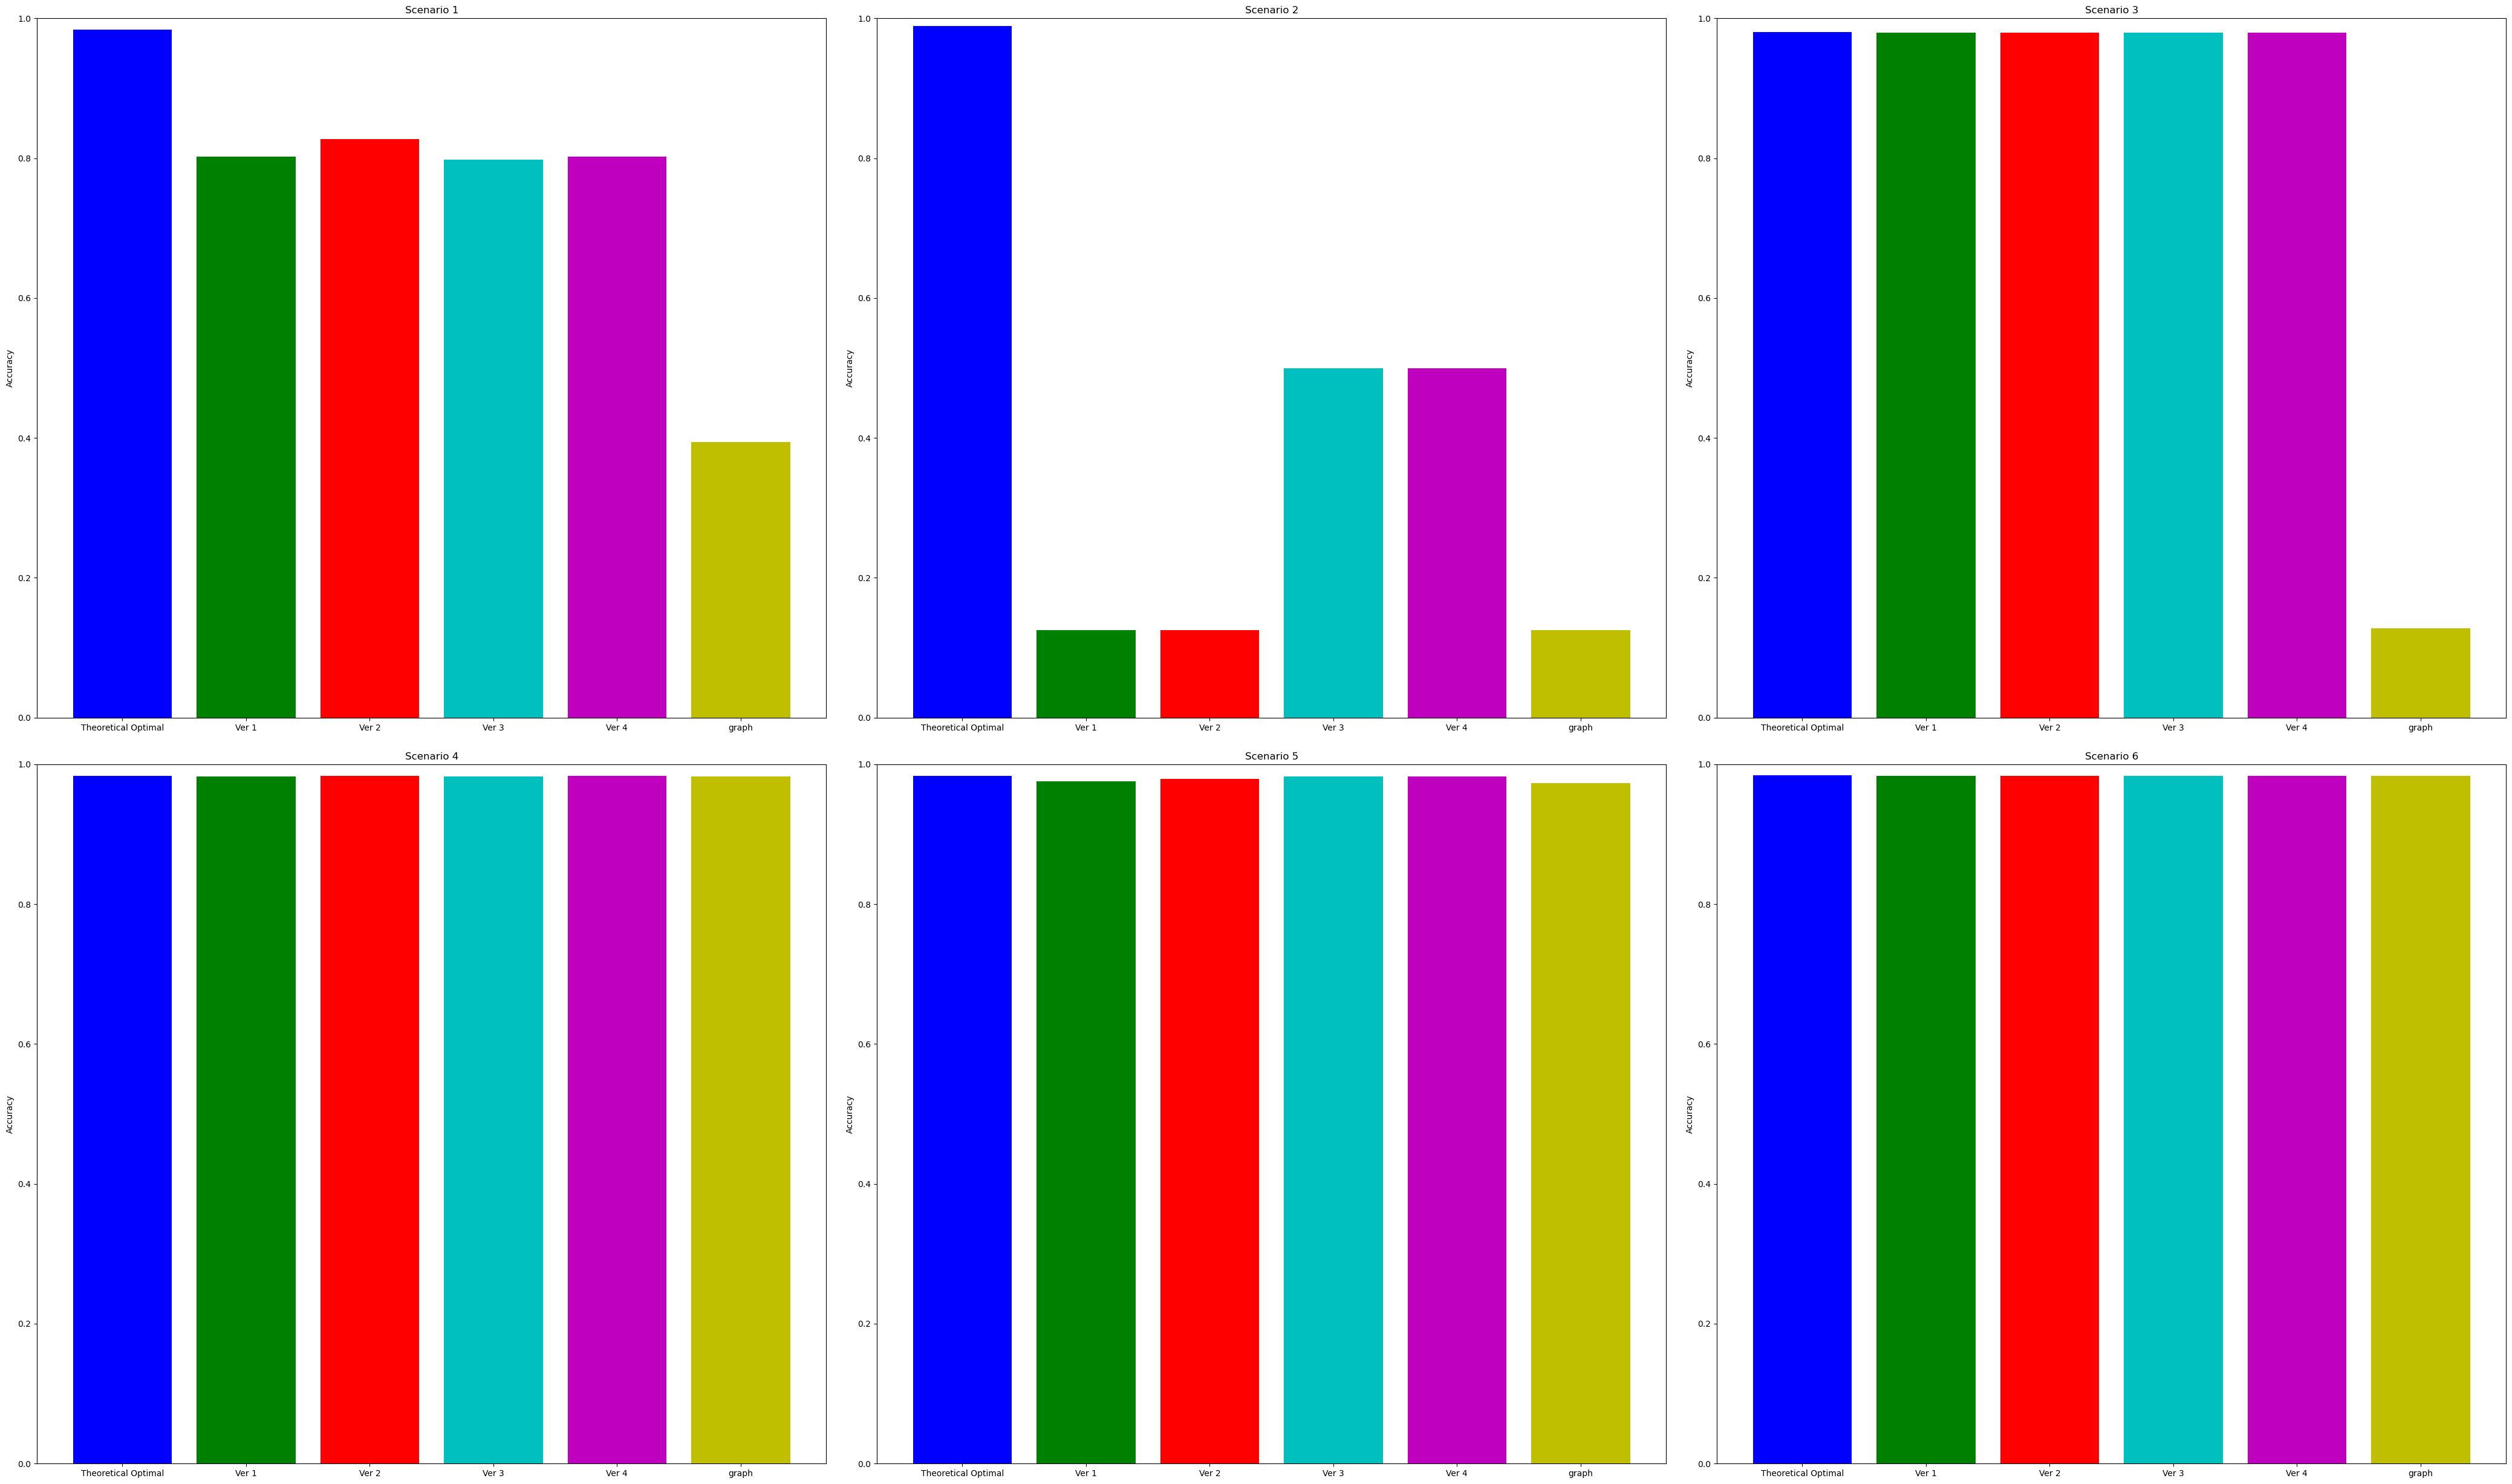

In [19]:
# plot accuracies for all scenarios in a 2x3 grid, add a different ylim for each scenarion to make sure the plots are readable
fig, axs = plt.subplots(2, 3)
axs[0, 0].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result1[0], result1[1], result1[2], result1[3], result1[4], result1[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 0].set_title('Scenario 1')
axs[0, 0].set_ylim([0,1])
axs[0, 1].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result2[0], result2[1], result2[2], result2[3], result2[4], result2[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 1].set_title('Scenario 2')
axs[0, 1].set_ylim([0,1])
axs[0, 2].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result3[0], result3[1], result3[2], result3[3], result3[4], result3[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 2].set_title('Scenario 3')
axs[0, 2].set_ylim([0,1])
axs[1, 0].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result4[0], result4[1], result4[2], result4[3], result4[4], result4[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 0].set_title('Scenario 4')
axs[1, 0].set_ylim([0,1])
axs[1, 1].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result5[0], result5[1], result5[2], result5[3], result5[4], result5[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 1].set_title('Scenario 5')
axs[1, 1].set_ylim([0,1])
axs[1, 2].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result6[0], result6[1], result6[2], result6[3], result6[4], result6[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 2].set_title('Scenario 6')
axs[1, 2].set_ylim([0,1])

#give y-axis label for accuracy
for ax in axs.flat:
    ax.set(ylabel='Accuracy')


# change figure size
fig.set_size_inches(42, 25)
# make the text bigger
plt.rcParams.update({'font.size': 22})
fig.tight_layout()
plt.savefig('accuracy_scenarios.png')

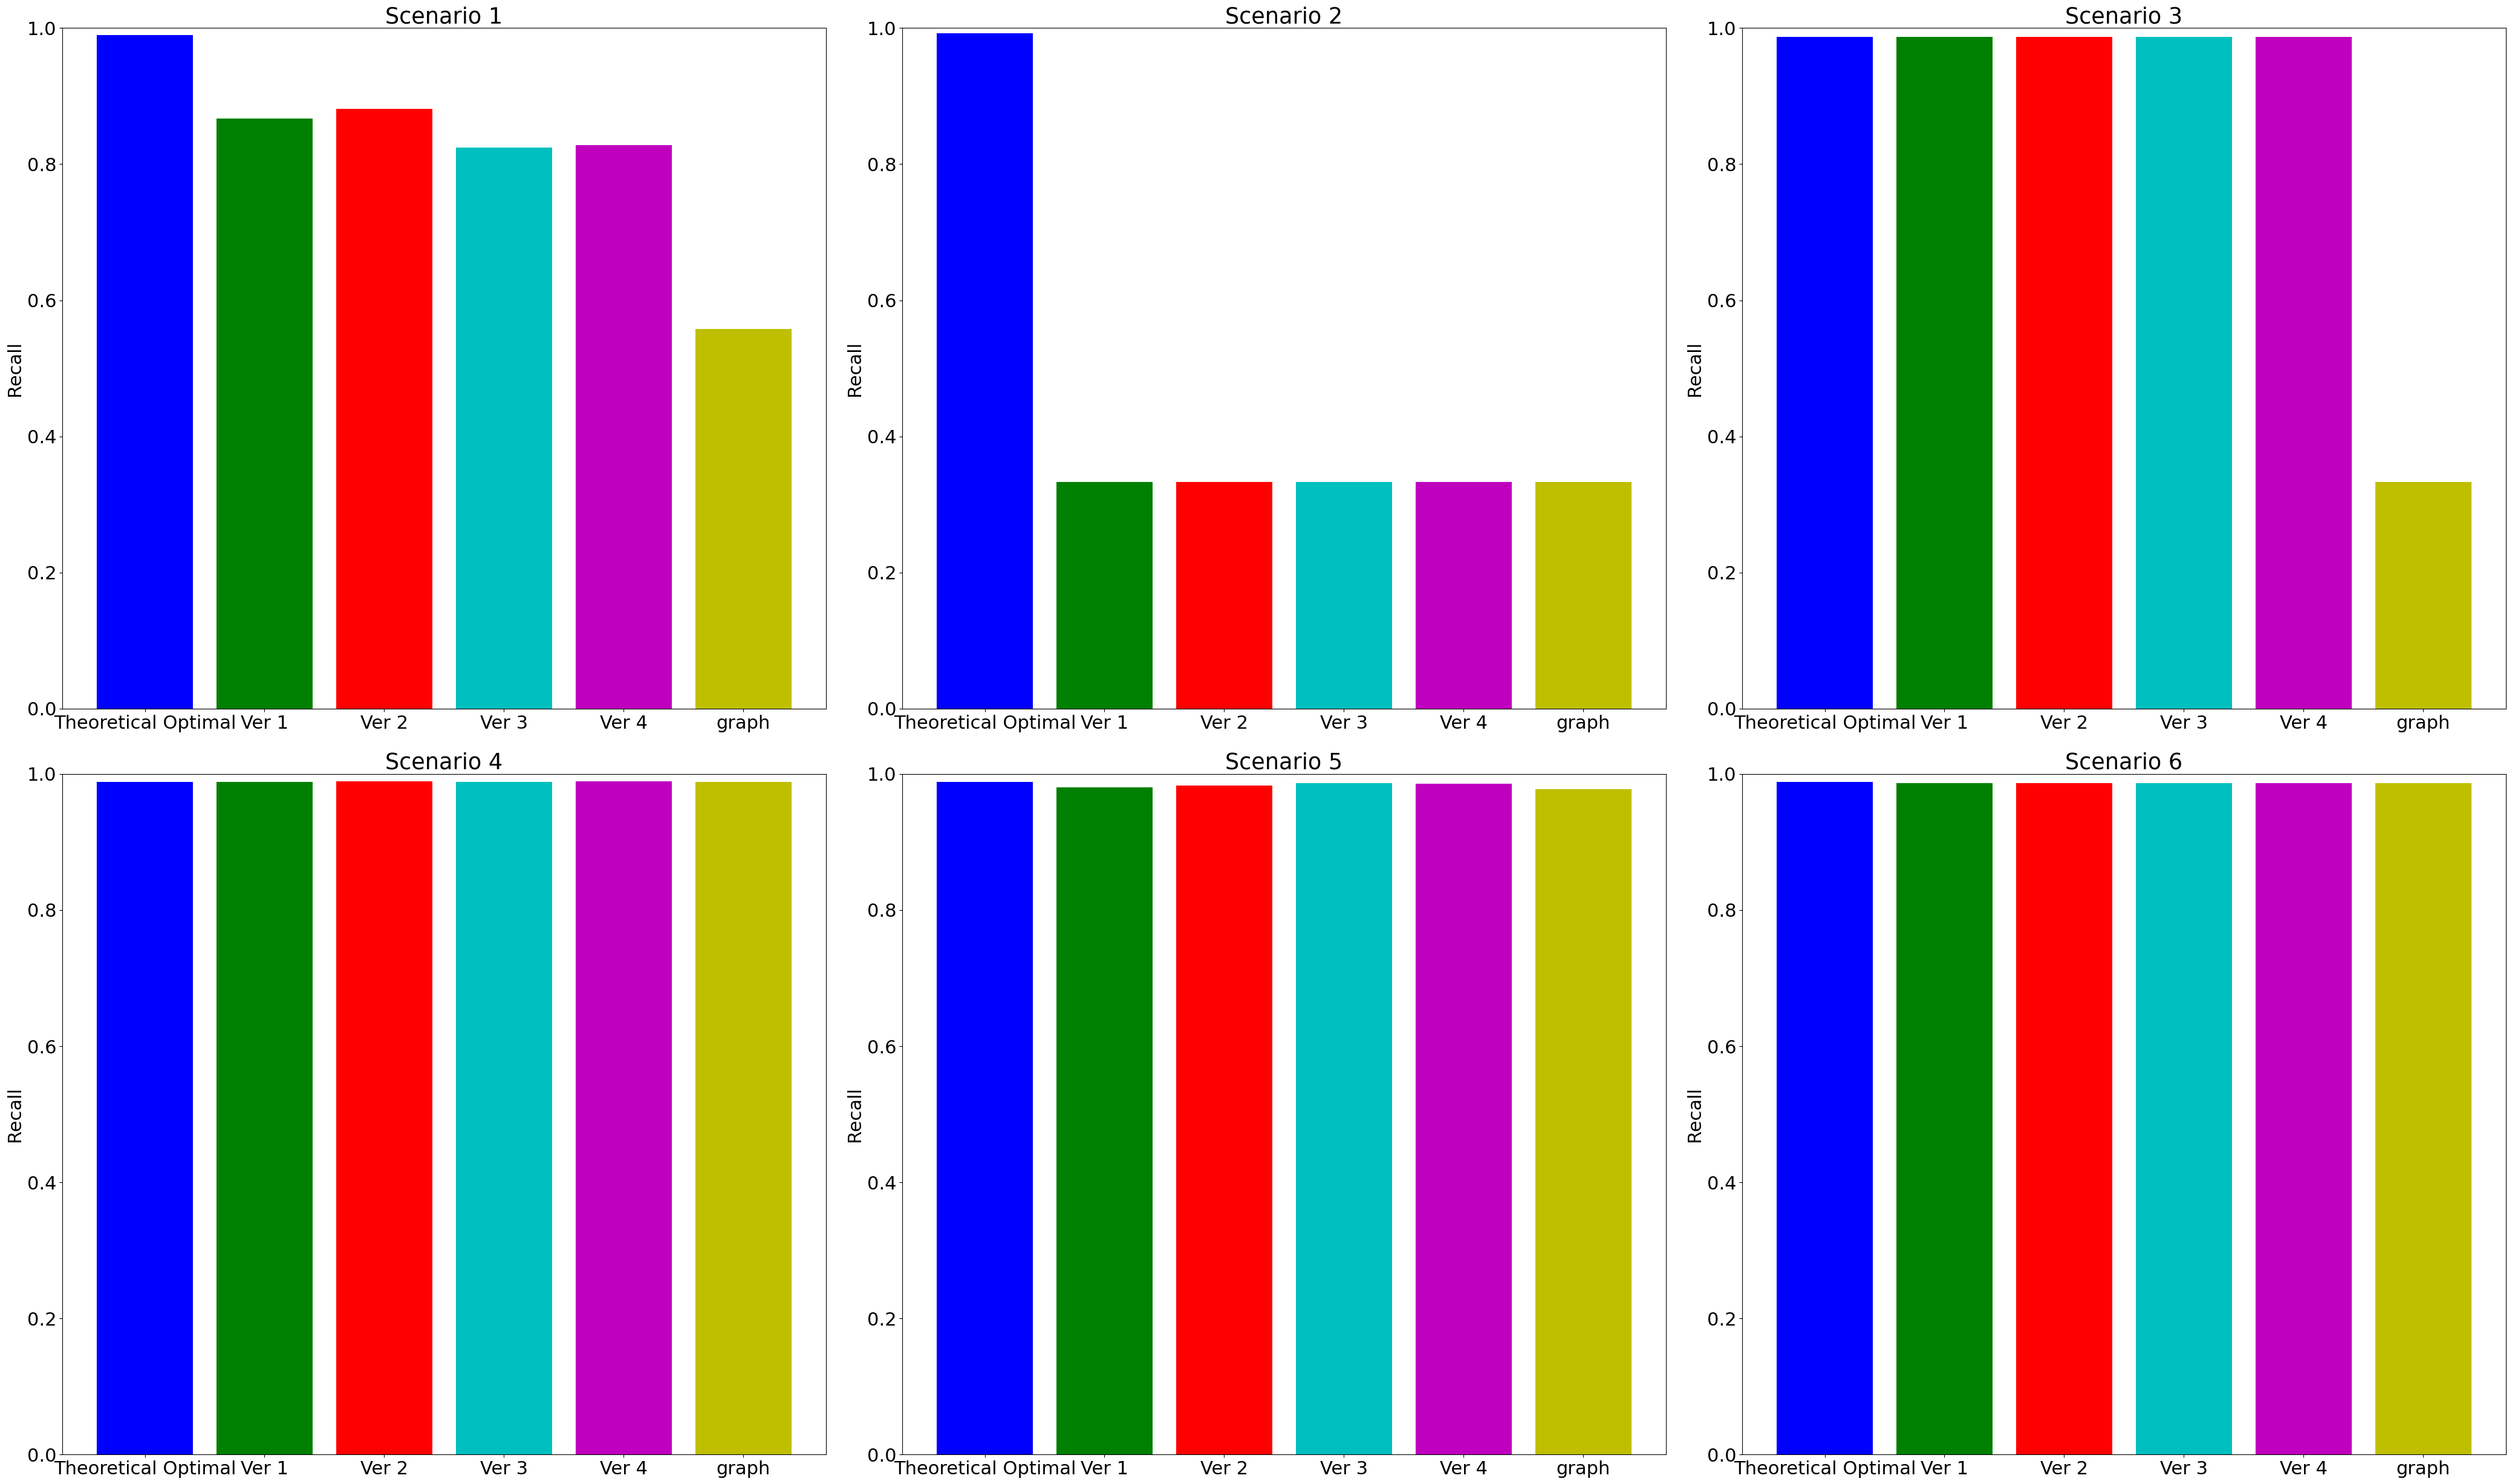

In [20]:
# plot accuracies for all scenarios in a 2x3 grid, add a different ylim for each scenarion to make sure the plots are readable
fig, axs = plt.subplots(2, 3)
axs[0, 0].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result1Recall[0], result1Recall[1], result1Recall[2], result1Recall[3], result1Recall[4], result1Recall[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 0].set_title('Scenario 1')
axs[0, 0].set_ylim([0,1])
axs[0, 1].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result2Recall[0], result2Recall[1], result2Recall[2], result2Recall[3], result2Recall[4], result2Recall[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 1].set_title('Scenario 2')
axs[0, 1].set_ylim([0,1])
axs[0, 2].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result3Recall[0], result3Recall[1], result3Recall[2], result3Recall[3], result3Recall[4], result3Recall[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 2].set_title('Scenario 3')
axs[0, 2].set_ylim([0,1])
axs[1, 0].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result4Recall[0], result4Recall[1], result4Recall[2], result4Recall[3], result4Recall[4], result4Recall[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 0].set_title('Scenario 4')
axs[1, 0].set_ylim([0,1])
axs[1, 1].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result5Recall[0], result5Recall[1], result5Recall[2], result5Recall[3], result5Recall[4], result5Recall[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 1].set_title('Scenario 5')
axs[1, 1].set_ylim([0,1])
axs[1, 2].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result6Recall[0], result6Recall[1], result6Recall[2], result6Recall[3], result6Recall[4], result6Recall[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 2].set_title('Scenario 6')
axs[1, 2].set_ylim([0,1])

#give y-axis label for accuracy
for ax in axs.flat:
    ax.set(ylabel='Recall')

# change figure size
fig.set_size_inches(42, 25)
# make the text bigger
plt.rcParams.update({'font.size': 22})
fig.tight_layout()
plt.savefig('recall_scenarios.png')

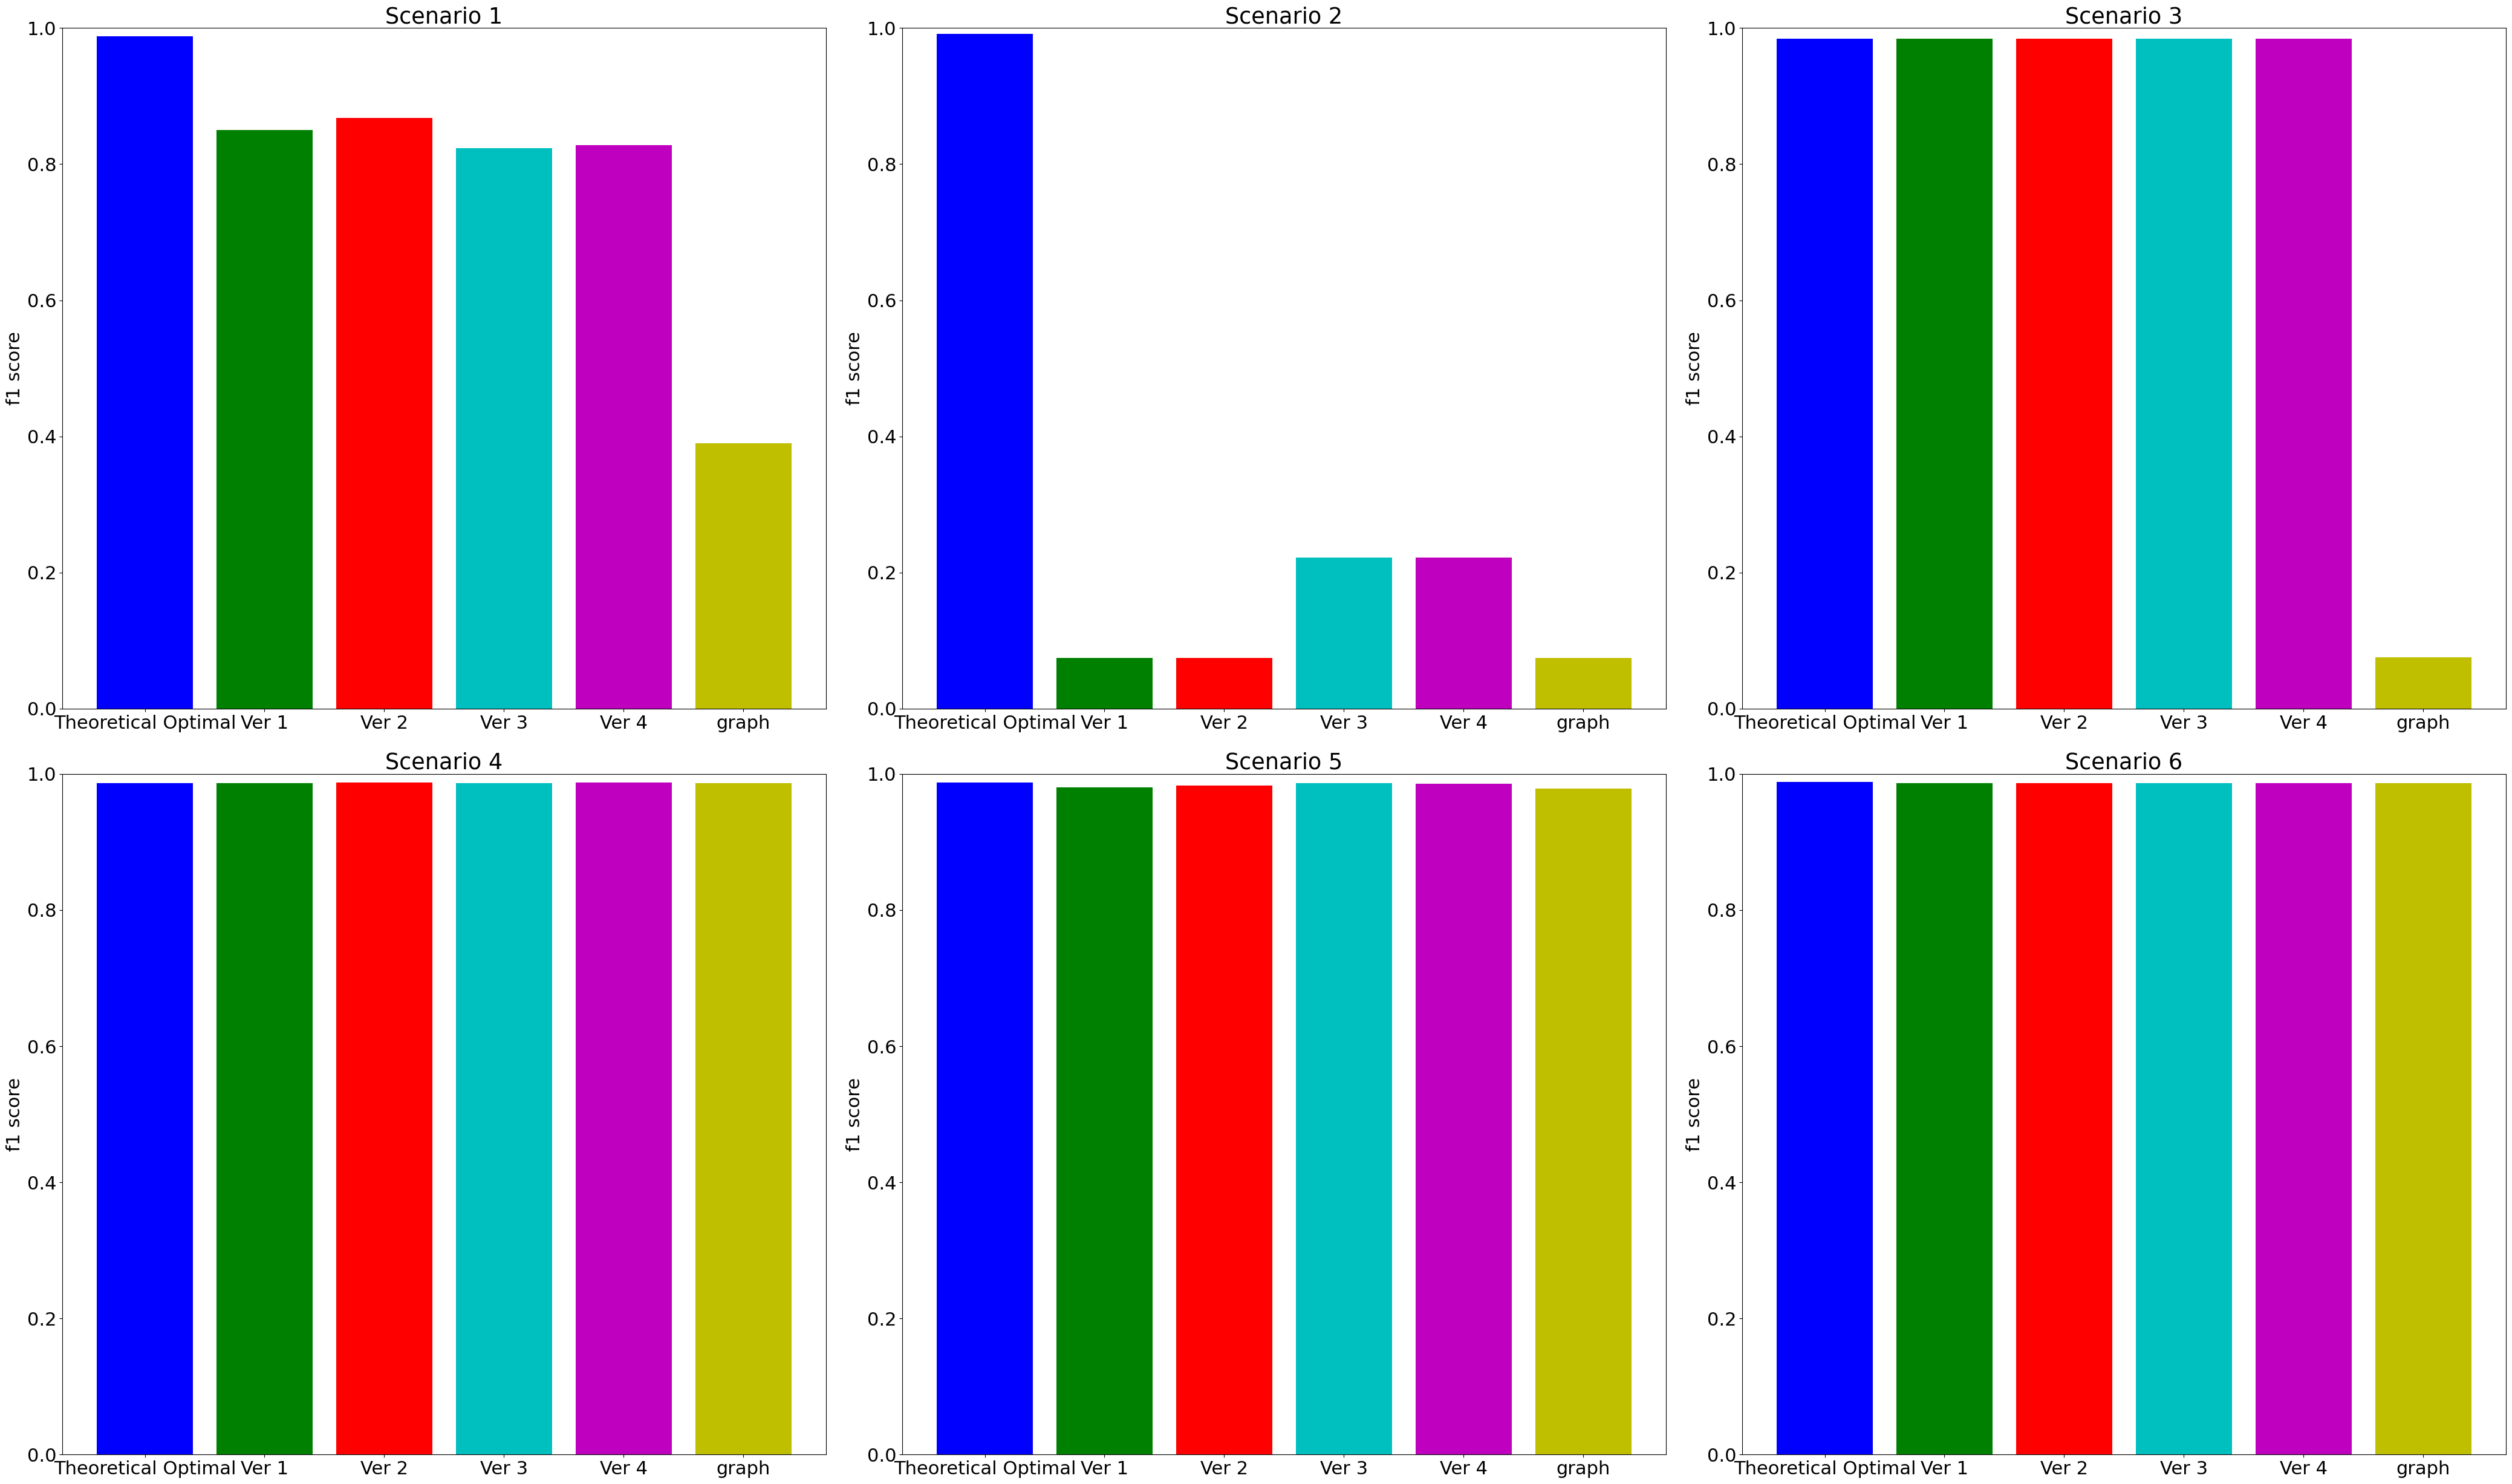

In [21]:
# plot accuracies for all scenarios in a 2x3 grid, add a different ylim for each scenarion to make sure the plots are readable
fig, axs = plt.subplots(2, 3)
axs[0, 0].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result1f1[0], result1f1[1], result1f1[2], result1f1[3], result1f1[4], result1f1[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 0].set_title('Scenario 1')
axs[0, 0].set_ylim([0,1])
axs[0, 1].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result2f1[0], result2f1[1], result2f1[2], result2f1[3], result2f1[4], result2f1[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 1].set_title('Scenario 2')
axs[0, 1].set_ylim([0,1])
axs[0, 2].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result3f1[0], result3f1[1], result3f1[2], result3f1[3], result3f1[4], result3f1[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 2].set_title('Scenario 3')
axs[0, 2].set_ylim([0,1])
axs[1, 0].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result4f1[0], result4f1[1], result4f1[2], result4f1[3], result4f1[4], result4f1[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 0].set_title('Scenario 4')
axs[1, 0].set_ylim([0,1])
axs[1, 1].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result5f1[0], result5f1[1], result5f1[2], result5f1[3], result5f1[4], result5f1[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 1].set_title('Scenario 5')
axs[1, 1].set_ylim([0,1])
axs[1, 2].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result6f1[0], result6f1[1], result6f1[2], result6f1[3], result6f1[4], result6f1[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 2].set_title('Scenario 6')
axs[1, 2].set_ylim([0,1])

#give y-axis label for accuracy
for ax in axs.flat:
    ax.set(ylabel='f1 score')

# change figure size
fig.set_size_inches(42, 25)
# make the text bigger
plt.rcParams.update({'font.size': 22})
fig.tight_layout()
plt.savefig('f1_scenarios.png')

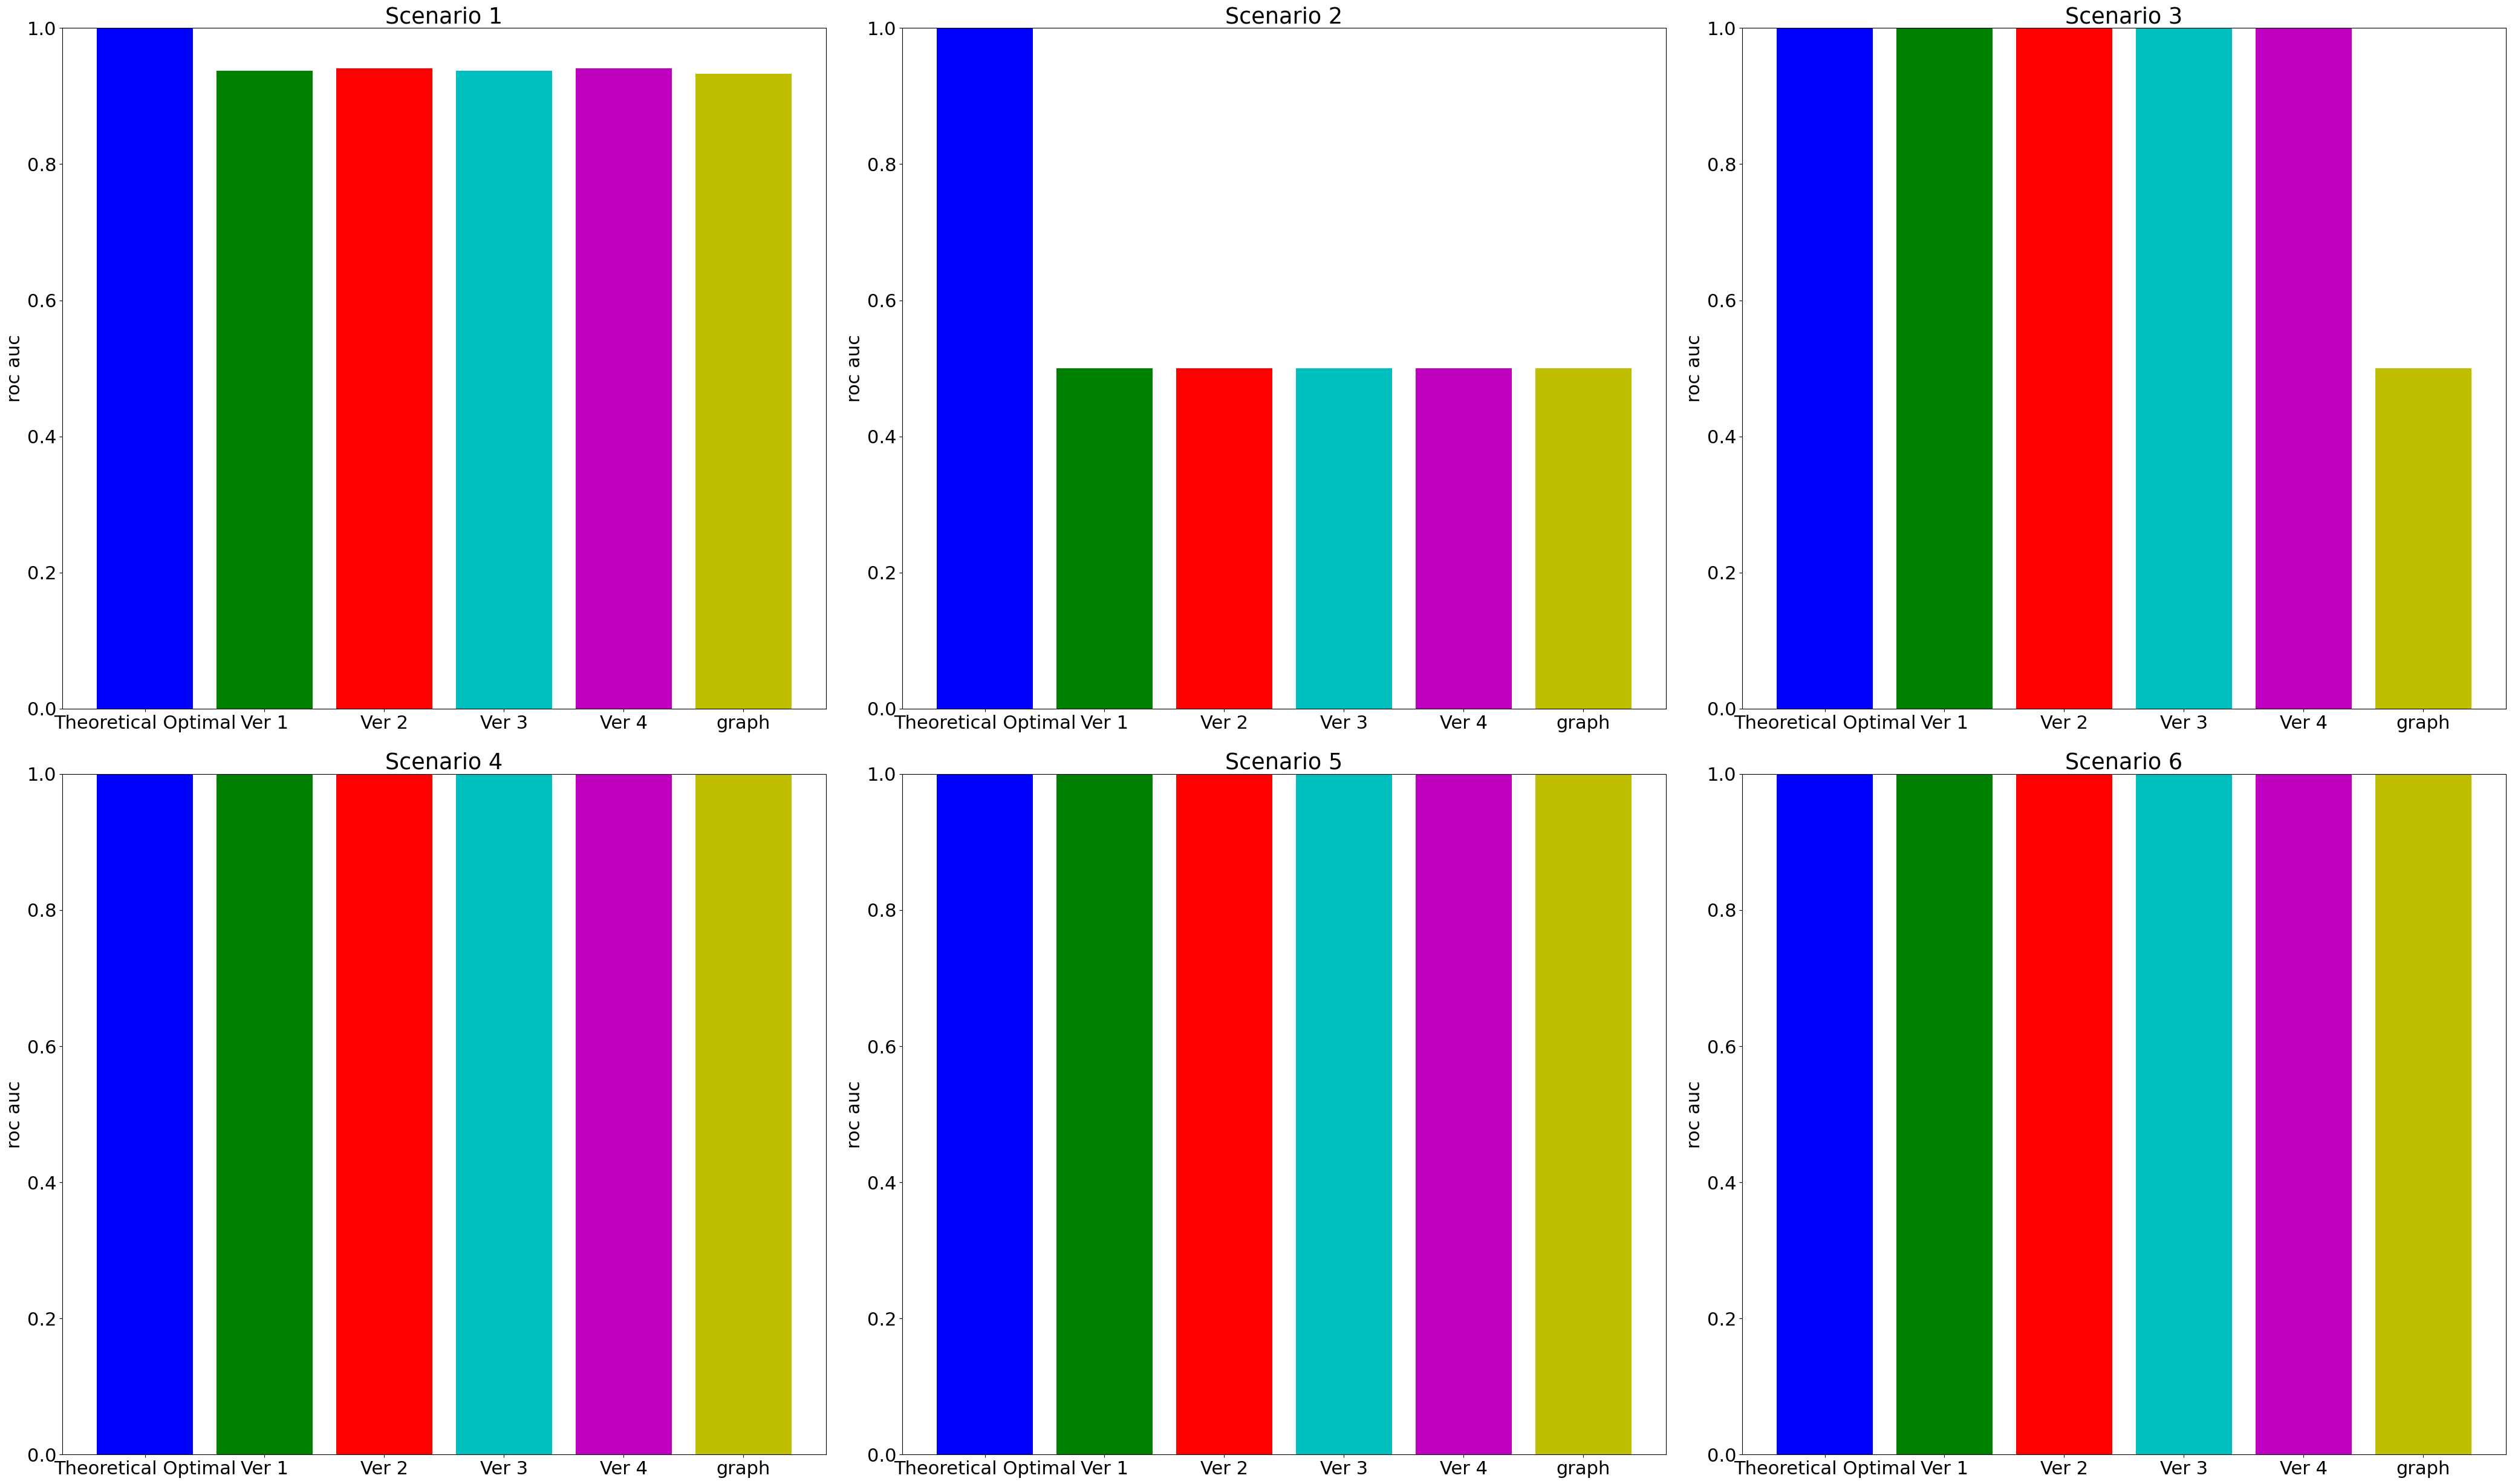

In [22]:
# plot roc auc for all scenarios in a 2x3 grid, add a different ylim for each scenarion to make sure the plots are readable
fig, axs = plt.subplots(2, 3)
axs[0, 0].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result1roc[0], result1roc[1], result1roc[2], result1roc[3], result1roc[4], result1roc[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 0].set_title('Scenario 1')
axs[0, 0].set_ylim([0,1])
axs[0, 1].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result2roc[0], result2roc[1], result2roc[2], result2roc[3], result2roc[4], result2roc[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 1].set_title('Scenario 2')
axs[0, 1].set_ylim([0,1])
axs[0, 2].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result3roc[0], result3roc[1], result3roc[2], result3roc[3], result3roc[4], result3roc[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[0, 2].set_title('Scenario 3')
axs[0, 2].set_ylim([0,1])
axs[1, 0].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result4roc[0], result4roc[1], result4roc[2], result4roc[3], result4roc[4], result4roc[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 0].set_title('Scenario 4')
axs[1, 0].set_ylim([0,1])
axs[1, 1].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result5roc[0], result5roc[1], result5roc[2], result5roc[3], result5roc[4], result5roc[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 1].set_title('Scenario 5')
axs[1, 1].set_ylim([0,1])
axs[1, 2].bar(['Theoretical Optimal', 'Ver 1', 'Ver 2', 'Ver 3', 'Ver 4', 'graph'], [result6roc[0], result6roc[1], result6roc[2], result6roc[3], result6roc[4], result6roc[5]], color=['b', 'g', 'r', 'c', 'm', 'y'])
axs[1, 2].set_title('Scenario 6')
axs[1, 2].set_ylim([0,1])

#give y-axis label for accuracy
for ax in axs.flat:
    ax.set(ylabel='roc auc')

# change figure size
fig.set_size_inches(42, 25)
# make the text bigger
plt.rcParams.update({'font.size': 22})
fig.tight_layout()
plt.savefig('roc_scenarios.png')


## Similarity Graph Algorithm

In [9]:
def fcngraph_from_nodes(train_nodes):
    # create a fully connected graph from train_nodes, where node name should be the index of the dataframe +1, and node attributes should be the values of the dataframe
    G = nx.Graph()
    for i in range(len(train_nodes)):
        G.add_node(i+1, data=train_nodes[i], classes = set(train_nodes[i]['data_sensitivity'].unique()))
    # add edges between all nodes
    for i in range(len(train_nodes)):
        for j in range(i+1, len(train_nodes)):
            G.add_edge(i+1, j+1)
    return G

In [10]:
# from train_nodes, create a connected graph with random edges
import random
def random_graph_from_nodes(train_nodes):
    G = nx.Graph()
    for i in range(len(train_nodes)):
        G.add_node(i+1, train_data=train_nodes[i], test_data = test_nodes[i], classes = set(train_nodes[i]['data_sensitivity'].unique()))
    # add edges between the nodes, each node can have between 1 and len(train_nodes)-1 edges randomly, but not to itself
    for i in range(len(train_nodes)):
        num_edges = random.randint(1, len(train_nodes)-1)
        for j in range(num_edges):
            neighbor = random.randint(1, len(train_nodes))
            if neighbor != i+1:
                G.add_edge(i+1, neighbor)
    return G

In [11]:
import networkx as nx
from collections import defaultdict

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

def bfs_traversal(graph, source, max_steps):
    visited = set()
    queue = [(source, 0)]

    while queue:
        node, step = queue.pop(0)
        if node not in visited:
            visited.add(node)
            if step < max_steps:
                for neighbor in graph.neighbors(node):
                    queue.append((neighbor, step + 1))

    return visited

def graph_node_weights(graph, max_steps=2, epsilon = 0.01):
    class_sets = nx.get_node_attributes(graph, 'classes')
    weights = defaultdict(float)
    uniqueness = defaultdict(float)

    for node in graph.nodes:
        neighbors = bfs_traversal(graph, node, max_steps)
        similarities = [jaccard_similarity(class_sets[node], class_sets[neighbor]) for neighbor in neighbors if neighbor != node]
        avg_similarity = sum(similarities) / len(similarities)
        uniqueness[node] = 1 - avg_similarity

    total_uniqueness = sum(uniqueness.values())
    for node in graph.nodes:
        weights[node] = uniqueness[node] / (total_uniqueness + epsilon)

    # create a list of weights from dictionary values
    weights_list = []
    for i in range(len(weights)):
        weights_list.append(weights[i+1])

    return weights_list


In [12]:
def test_graph_approach(train_nodes, test_nodes):
    G = random_graph_from_nodes(train_nodes)
    node_weights = graph_node_weights(G)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    acc = accuracy_score(test_nodes[0]['data_sensitivity'], y_pred)
    return acc

In [13]:
def crossval_test_graph_approach(train_nodes, test_nodes, max_steps = 2):
    G = random_graph_from_nodes(train_nodes)
    node_weights = graph_node_weights(G, max_steps=max_steps)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    
    # calculate the accuracy of the prediction
    acc_list = []

    for _ in range(len(test_nodes)):
        # find y_pred using weightedVoting
        y_pred = weightedVoting(sourceModels, test_nodes[_], node_weights)
        acc_list.append(accuracy_score(test_nodes[_]['data_sensitivity'], y_pred))
    # take average of all accuracies
    acc = sum(acc_list)/len(acc_list)
    return acc

In [24]:
# import data from /Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5 into a train_nodes and test_nodes lists
train_nodes = []
test_nodes = []
for i in range(5):
    train_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5/Train/node' + str(i+1) + '.csv'))
    test_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5/Test/node' + str(i+1) + '.csv'))

In [25]:
G = random_graph_from_nodes(train_nodes)

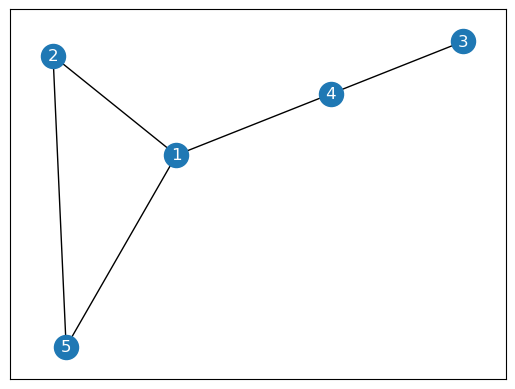

In [32]:
# visualize the graph
# nx.draw_networkx(G, with_labels=True)
# make the text inside the nodes white
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True, font_color='w')
# save the graph as png
plt.savefig('random_graph.png')

In [10]:
# import data from /Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5 into a train_nodes and test_nodes lists
train_nodes = []
test_nodes = []
for i in range(5):
    train_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5/Train/node' + str(i+1) + '.csv'))
    test_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5/Test/node' + str(i+1) + '.csv'))
crossval_test_graph_approach(train_nodes, test_nodes)

0.934375

In [11]:
# import data from /Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5 into a train_nodes and test_nodes lists
train_nodes = []
test_nodes = []
for i in range(10):
    train_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes10/Train/node' + str(i+1) + '.csv'))
    test_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes10/Test/node' + str(i+1) + '.csv'))
crossval_test_graph_approach(train_nodes, test_nodes)

0.974375

In [77]:
def crossval_test_all_approaches(train_nodes, test_nodes, max_steps = 2):
    G = random_graph_from_nodes(train_nodes)
    node_weights_graph = graph_node_weights(G, max_steps=max_steps)
    node_weights_freq = calculate_node_weights_with_frequencies(train_nodes)
    # train source models for each node in train_nodes
    sourceModels = []
    for i in range(len(train_nodes)):
        sourceModels.append(sourceRFModel(train_nodes[i]))
    
    # calculate the accuracy of the prediction
    acc_list_graph = []
    acc_list_freq = []

    for _ in range(len(test_nodes)):
        # find y_pred using weightedVoting
        y_pred = weightedVoting(sourceModels, test_nodes[_], node_weights_graph)
        acc_list_graph.append(accuracy_score(test_nodes[_]['data_sensitivity'], y_pred))
        y_pred = weightedVoting(sourceModels, test_nodes[_], node_weights_freq)
        acc_list_freq.append(accuracy_score(test_nodes[_]['data_sensitivity'], y_pred))
    # take average of all accuracies
    acc_graph = sum(acc_list_graph)/len(acc_list_graph)
    acc_freq = sum(acc_list_freq)/len(acc_list_freq)
    # find std of acc_graph and acc_freq
    std_graph = np.std(acc_list_graph)
    std_freq = np.std(acc_list_freq)
    return acc_graph, acc_freq, std_graph, std_freq

In [78]:
# import data from /Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5 into a train_nodes and test_nodes lists
train_nodes = []
test_nodes = []
for i in range(5):
    train_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5/Train/node' + str(i+1) + '.csv'))
    test_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5/Test/node' + str(i+1) + '.csv'))
acc_graph_5, acc_div_5, std_graph_5, std_div_5 = crossval_test_all_approaches(train_nodes, test_nodes)

In [79]:
# import data from /Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5 into a train_nodes and test_nodes lists
train_nodes = []
test_nodes = []
for i in range(10):
    train_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes10/Train/node' + str(i+1) + '.csv'))
    test_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes10/Test/node' + str(i+1) + '.csv'))
acc_graph_10, acc_div_10, std_graph_10, std_div_10 = crossval_test_all_approaches(train_nodes, test_nodes)

In [80]:
# import data from /Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5 into a train_nodes and test_nodes lists
train_nodes = []
test_nodes = []
for i in range(15):
    train_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes15/Train/node' + str(i+1) + '.csv'))
    test_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes15/Test/node' + str(i+1) + '.csv'))
acc_graph_15, acc_div_15, std_graph_15, std_div_15 = crossval_test_all_approaches(train_nodes, test_nodes)

In [81]:
# import data from /Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes5 into a train_nodes and test_nodes lists
train_nodes = []
test_nodes = []
for i in range(20):
    train_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes20/Train/node' + str(i+1) + '.csv'))
    test_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/processed/nodes20/Test/node' + str(i+1) + '.csv'))
acc_graph_20, acc_div_20, std_graph_20, std_div_20 = crossval_test_all_approaches(train_nodes, test_nodes)

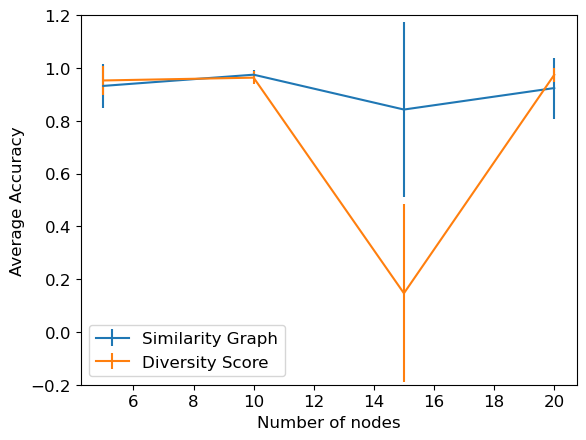

In [85]:
# plot the acc_graph and acc_div for each number of nodes with std as error bars
acc_graph = [acc_graph_5, acc_graph_10, acc_graph_15, acc_graph_20]
acc_div = [acc_div_5, acc_div_10, acc_div_15, acc_div_20]
std_graph = [std_graph_5, std_graph_10, std_graph_15, std_graph_20]
std_div = [std_div_5, std_div_10, std_div_15, std_div_20]
x = [5, 10, 15, 20]
plt.errorbar(x, acc_graph, yerr=std_graph, label='Similarity Graph')
plt.errorbar(x, acc_div, yerr=std_div, label='Diversity Score')
# reset text size
plt.rcParams.update({'font.size': 12})
plt.ylim(-0.2, 1.2)
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('Average Accuracy')
plt.savefig('scalability_graph.png')

Text(0, 0.5, 'Accuracy')

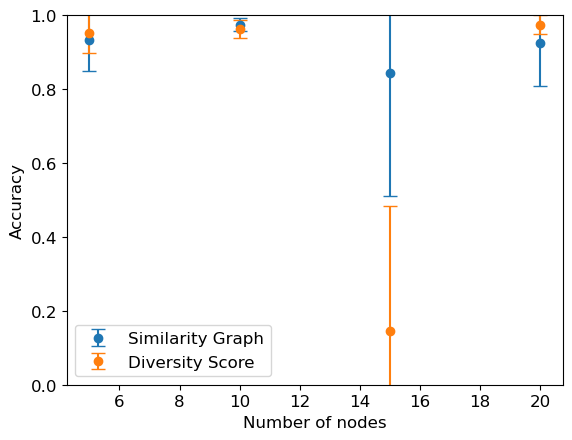

In [83]:
# plot the acc_graph and acc_div for each number of nodes with std as error bars, make error bars look better
acc_graph = [acc_graph_5, acc_graph_10, acc_graph_15, acc_graph_20]
acc_div = [acc_div_5, acc_div_10, acc_div_15, acc_div_20]
std_graph = [std_graph_5, std_graph_10, std_graph_15, std_graph_20]
std_div = [std_div_5, std_div_10, std_div_15, std_div_20]
x = [5, 10, 15, 20]
plt.errorbar(x, acc_graph, yerr=std_graph, label='Similarity Graph', fmt='o', capsize=5)
plt.errorbar(x, acc_div, yerr=std_div, label='Diversity Score', fmt='o', capsize=5)
# reset text size
plt.rcParams.update({'font.size': 12})
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Average Accuracy')

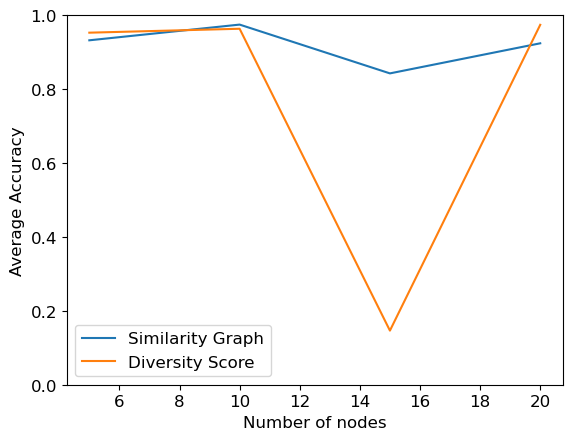

In [76]:
# plot the acc_graph and acc_div for each number of nodes
acc_graph = [acc_graph_5, acc_graph_10, acc_graph_15, acc_graph_20]
acc_div = [acc_div_5, acc_div_10, acc_div_15, acc_div_20]
plt.plot([5, 10, 15, 20], acc_graph, label='Similarity Graph')
plt.plot([5, 10, 15, 20], acc_div, label='Diversity Score')
# reset text size
plt.rcParams.update({'font.size': 12})
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('Average Accuracy')


Text(0, 0.5, 'Average Accuracy')

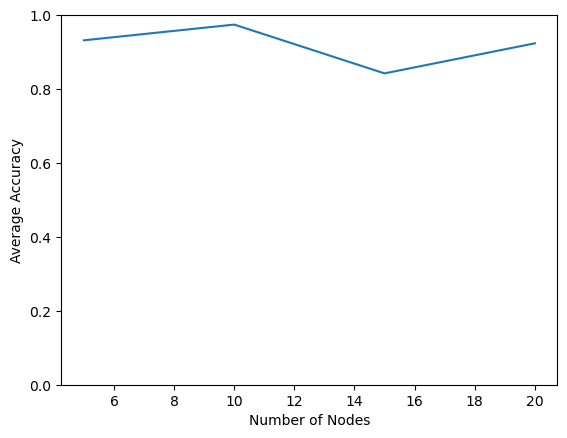

In [18]:
# plot the acc_graph for each number of nodes
x = [5, 10, 15, 20]
y = [acc_graph_5, acc_graph_10, acc_graph_15, acc_graph_20]
plt.plot(x, y)
# set y axis limits
plt.ylim(0, 1)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Accuracy')

## Activity Detection Dataset

In [8]:
train_nodes = []
test_nodes = []
# read all train and test nodes from /Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/activityDetection
for i in range(101,109):
    train_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/activityDetection/Train/subject' + str(i) + '.csv'))
    test_nodes.append(pd.read_csv('/Users/saeedalqubaisi/Desktop/thesis/Adaptive-Collaborative-Learning-for-Distrubted-Edge-Networks/data/activityDetection/Test/subject' + str(i) + '.csv'))

In [13]:
def runModels(train_nodes, test_nodes):
    # Run Non-distibuted theoretical optimal
    # combine all traning data into one dataframe
    trainData = pd.concat(train_nodes)
    # train a random forest on trainData
    clf = sourceRFModel(trainData)
    # predict the labels of node3
    y_pred = predictTarNode(clf, test_nodes[0])
    # calculate the accuracy of the prediction
    res1 = accuracy_score(test_nodes[0]['activityID'], y_pred)
    # print("Non-distributed Theoretical Optimal: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # Run Distributed Theoretical Optimal
    # Run gridsearch to find the best combination of node weights and class weights

    # Dynamic Algorithm

    # Using binary class distribution to find node weights

    # without class weights
    node_weights = calculate_node_weights(train_nodes)
    # train source models for each node in train_nodes
    sourceRFModels = []
    for i in range(len(train_nodes)):
        sourceRFModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceRFModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res2 = accuracy_score(test_nodes[0]['activityID'], y_pred)
    # print("Binary class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with class weights
    node_weights = calculate_node_weights(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceAdjModels = []
    for i in range(len(train_nodes)):
        sourceAdjModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceAdjModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res3 = accuracy_score(test_nodes[0]['activityID'], y_pred)
    # print("Binary class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # # with a threshold of 0.1 for class weights
    # node_weights = calculate_node_weights(train_nodes)
    # class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # # train source models for each node in train_nodes using sourceModelAdjWeight
    # sourceModels = []
    # for i in range(len(train_nodes)):
    #     sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # # find y_pred using weightedVoting
    # y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # # calculate the accuracy of the prediction
    # res4  = accuracy_score(test_nodes[0]['activityID'], y_pred)
    # print("Binary class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # using class distribution with frequencies to find node weights

    # without class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    # train source models for each node in train_nodes
    # sourceModels = []
    # for i in range(len(train_nodes)):
    #     sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceRFModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res5 = accuracy_score(test_nodes[0]['activityID'], y_pred)
    # print("Frequency class distribution without class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # with class weights
    node_weights = calculate_node_weights_with_frequencies(train_nodes)
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    # sourceModels = []
    # for i in range(len(train_nodes)):
    #     sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceAdjModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res6 = accuracy_score(test_nodes[0]['activityID'], y_pred)
    # print("Frequency class distribution with class weights: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # # with a threshold of 0.1 for class weights
    # node_weights = calculate_node_weights_with_frequencies(train_nodes)
    # class_weights = calculate_class_weights(train_nodes, threshold=0.1)
    # # train source models for each node in train_nodes using sourceModelAdjWeight
    # sourceModels = []
    # for i in range(len(train_nodes)):
    #     sourceModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))
    # # find y_pred using weightedVoting
    # y_pred = weightedVoting(sourceModels, test_nodes[0], node_weights)
    # # calculate the accuracy of the prediction
    # res7 = accuracy_score(test_nodes[0]['activityID'], y_pred)
    # print("Frequency class distribution with class weights and 0.1 threshold: ",accuracy_score(test_nodes[0]['data_sensitivity'], y_pred))

    # graph approach with binary occurence
    G = fcngraph_from_nodes(train_nodes)
    node_weights = graph_node_weights(G)
    # train source models for each node in train_nodes
    # sourceModels = []
    # for i in range(len(train_nodes)):
    #     sourceModels.append(sourceRFModel(train_nodes[i]))
    # find y_pred using weightedVoting
    y_pred = weightedVoting(sourceRFModels, test_nodes[0], node_weights)
    # calculate the accuracy of the prediction
    res8 = accuracy_score(test_nodes[0]['activityID'], y_pred)

    return [res1, res2, res3, res5, res6, res8]

In [11]:
def crossval_test_accuracy(train_nodes, test_nodes):
    ver1 = []
    ver2 = []
    ver3 = []
    ver4 = []
    graphRes = []

    # train source models
    # without class weights
    # train source models for each node in train_nodes
    sourceRFModels = []
    for i in range(len(train_nodes)):
        sourceRFModels.append(sourceRFModel(train_nodes[i]))

    # with class weights
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceAdjModels = []
    for i in range(len(train_nodes)):
        sourceAdjModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))

    for _ in range(len(test_nodes)):
        testNode = test_nodes[_]
        _train_nodes = train_nodes.copy()
        _train_nodes.pop(_)

        _sourceRFModels = sourceRFModels.copy()
        _sourceRFModels.pop(_)
        _sourceAdjModels = sourceAdjModels.copy()
        _sourceAdjModels.pop(_)

        node_weights_bin = calculate_node_weights(_train_nodes)
        node_weights_freq = calculate_node_weights_with_frequencies(_train_nodes)
        G = fcngraph_from_nodes(_train_nodes)
        node_weights_graph = graph_node_weights(G)

        #ver1 pred
        y_pred_ver1 = weightedVoting(_sourceRFModels, testNode, node_weights_bin)
        #ver 2 pred
        y_pred_ver2 = weightedVoting(_sourceAdjModels, testNode, node_weights_bin)
        #ver 3 pred
        y_pred_ver3 = weightedVoting(_sourceRFModels, testNode, node_weights_freq)
        #ver 4 pred
        y_pred_ver4 = weightedVoting(_sourceAdjModels, testNode, node_weights_freq)
        #graph pred
        y_pred_graph = weightedVoting(_sourceRFModels, testNode, node_weights_graph)

        # append accuracy scores
        ver1.append(accuracy_score(testNode['activityID'], y_pred_ver1))
        ver2.append(accuracy_score(testNode['activityID'], y_pred_ver2))
        ver3.append(accuracy_score(testNode['activityID'], y_pred_ver3))
        ver4.append(accuracy_score(testNode['activityID'], y_pred_ver4))
        graphRes.append(accuracy_score(testNode['activityID'], y_pred_graph))

    # take average of accuracy scores
    accuracy_avg = [np.mean(ver1), np.mean(ver2), np.mean(ver3), np.mean(ver4), np.mean(graphRes)]
    accuracy_std = [np.std(ver1), np.std(ver2), np.std(ver3), np.std(ver4), np.std(graphRes)]

    return accuracy_avg, accuracy_std

In [15]:
def crossval_test_recall(train_nodes, test_nodes):
    ver1 = []
    ver2 = []
    ver3 = []
    ver4 = []
    graphRes = []

    # train source models
    # without class weights
    # train source models for each node in train_nodes
    sourceRFModels = []
    for i in range(len(train_nodes)):
        sourceRFModels.append(sourceRFModel(train_nodes[i]))

    # with class weights
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceAdjModels = []
    for i in range(len(train_nodes)):
        sourceAdjModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))

    for _ in range(len(test_nodes)):
        testNode = test_nodes[_]
        _train_nodes = train_nodes.copy()
        _train_nodes.pop(_)

        _sourceRFModels = sourceRFModels.copy()
        _sourceRFModels.pop(_)
        _sourceAdjModels = sourceAdjModels.copy()
        _sourceAdjModels.pop(_)

        node_weights_bin = calculate_node_weights(_train_nodes)
        node_weights_freq = calculate_node_weights_with_frequencies(_train_nodes)
        G = fcngraph_from_nodes(_train_nodes)
        node_weights_graph = graph_node_weights(G)

        #ver1 pred
        y_pred_ver1 = weightedVoting(_sourceRFModels, testNode, node_weights_bin)
        #ver 2 pred
        y_pred_ver2 = weightedVoting(_sourceAdjModels, testNode, node_weights_bin)
        #ver 3 pred
        y_pred_ver3 = weightedVoting(_sourceRFModels, testNode, node_weights_freq)
        #ver 4 pred
        y_pred_ver4 = weightedVoting(_sourceAdjModels, testNode, node_weights_freq)
        #graph pred
        y_pred_graph = weightedVoting(_sourceRFModels, testNode, node_weights_graph)

        # append accuracy scores
        ver1.append(recall_score(testNode['activityID'], y_pred_ver1, average='macro'))
        ver2.append(recall_score(testNode['activityID'], y_pred_ver2, average='macro'))
        ver3.append(recall_score(testNode['activityID'], y_pred_ver3, average='macro'))
        ver4.append(recall_score(testNode['activityID'], y_pred_ver4, average='macro'))
        graphRes.append(recall_score(testNode['activityID'], y_pred_graph, average='macro'))

    # take average of accuracy scores
    accuracy_avg = [np.mean(ver1), np.mean(ver2), np.mean(ver3), np.mean(ver4), np.mean(graphRes)]
    accuracy_std = [np.std(ver1), np.std(ver2), np.std(ver3), np.std(ver4), np.std(graphRes)]

    return accuracy_avg, accuracy_std

In [17]:
def crossval_test_f1(train_nodes, test_nodes):
    ver1 = []
    ver2 = []
    ver3 = []
    ver4 = []
    graphRes = []

    # train source models
    # without class weights
    # train source models for each node in train_nodes
    sourceRFModels = []
    for i in range(len(train_nodes)):
        sourceRFModels.append(sourceRFModel(train_nodes[i]))

    # with class weights
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceAdjModels = []
    for i in range(len(train_nodes)):
        sourceAdjModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))

    for _ in range(len(test_nodes)):
        testNode = test_nodes[_]
        _train_nodes = train_nodes.copy()
        _train_nodes.pop(_)

        _sourceRFModels = sourceRFModels.copy()
        _sourceRFModels.pop(_)
        _sourceAdjModels = sourceAdjModels.copy()
        _sourceAdjModels.pop(_)

        node_weights_bin = calculate_node_weights(_train_nodes)
        node_weights_freq = calculate_node_weights_with_frequencies(_train_nodes)
        G = fcngraph_from_nodes(_train_nodes)
        node_weights_graph = graph_node_weights(G)

        #ver1 pred
        y_pred_ver1 = weightedVoting(_sourceRFModels, testNode, node_weights_bin)
        #ver 2 pred
        y_pred_ver2 = weightedVoting(_sourceAdjModels, testNode, node_weights_bin)
        #ver 3 pred
        y_pred_ver3 = weightedVoting(_sourceRFModels, testNode, node_weights_freq)
        #ver 4 pred
        y_pred_ver4 = weightedVoting(_sourceAdjModels, testNode, node_weights_freq)
        #graph pred
        y_pred_graph = weightedVoting(_sourceRFModels, testNode, node_weights_graph)

        # append accuracy scores
        ver1.append(f1_score(testNode['activityID'], y_pred_ver1, average='macro'))
        ver2.append(f1_score(testNode['activityID'], y_pred_ver2, average='macro'))
        ver3.append(f1_score(testNode['activityID'], y_pred_ver3, average='macro'))
        ver4.append(f1_score(testNode['activityID'], y_pred_ver4, average='macro'))
        graphRes.append(f1_score(testNode['activityID'], y_pred_graph, average='macro'))

    # take average of accuracy scores
    accuracy_avg = [np.mean(ver1), np.mean(ver2), np.mean(ver3), np.mean(ver4), np.mean(graphRes)]
    accuracy_std = [np.std(ver1), np.std(ver2), np.std(ver3), np.std(ver4), np.std(graphRes)]

    return accuracy_avg, accuracy_std

In [29]:
def crossval_test_rocauc(train_nodes, test_nodes):
    ver1 = []
    ver2 = []
    ver3 = []
    ver4 = []
    graphRes = []

    # train source models
    # without class weights
    # train source models for each node in train_nodes
    sourceRFModels = []
    for i in range(len(train_nodes)):
        sourceRFModels.append(sourceRFModel(train_nodes[i]))

    # with class weights
    class_weights = calculate_class_weights(train_nodes)
    # train source models for each node in train_nodes using sourceModelAdjWeight
    sourceAdjModels = []
    for i in range(len(train_nodes)):
        sourceAdjModels.append(sourceModelAdjWeight(train_nodes[i], class_weights[i+1]))

    for _ in range(len(test_nodes)):
        testNode = test_nodes[_]
        _train_nodes = train_nodes.copy()
        _train_nodes.pop(_)

        _sourceRFModels = sourceRFModels.copy()
        _sourceRFModels.pop(_)
        _sourceAdjModels = sourceAdjModels.copy()
        _sourceAdjModels.pop(_)

        node_weights_bin = calculate_node_weights(_train_nodes)
        node_weights_freq = calculate_node_weights_with_frequencies(_train_nodes)
        G = fcngraph_from_nodes(_train_nodes)
        node_weights_graph = graph_node_weights(G)

        #ver1 pred
        y_score_ver1 = weightedVoting(_sourceRFModels, testNode, node_weights_bin, return_proba=True)
        #ver 2 pred
        y_score_ver2 = weightedVoting(_sourceAdjModels, testNode, node_weights_bin, return_proba=True)
        #ver 3 pred
        y_score_ver3 = weightedVoting(_sourceRFModels, testNode, node_weights_freq, return_proba=True)
        #ver 4 pred
        y_score_ver4 = weightedVoting(_sourceAdjModels, testNode, node_weights_freq, return_proba=True)
        #graph pred
        y_score_graph = weightedVoting(_sourceRFModels, testNode, node_weights_graph, return_proba=True)
        y_score_graph = y_score_graph + (1 - y_score_graph.sum(axis=1, keepdims=True))/len(y_score_graph[0])

        # # add columns to y_score_ver1 for classes that are present in testNode['activityID'] but not in y_score_ver1
        # for i in range(len(y_score_ver1)):
        #     for j in range(1, 14):
        #         if j not in y_score_ver1[i]:
        #             y_score_ver1[i].insert(j-1, 0)


        # append accuracy scores
        print(y_score_ver1)
        ver1.append(roc_auc_score(testNode['activityID'], y_score_ver1, average='macro', multi_class='ovo'))
        ver2.append(roc_auc_score(testNode['activityID'], y_score_ver2, average='macro', multi_class='ovo'))
        ver3.append(roc_auc_score(testNode['activityID'], y_score_ver3, average='macro', multi_class='ovo'))
        ver4.append(roc_auc_score(testNode['activityID'], y_score_ver4, average='macro', multi_class='ovo'))
        graphRes.append(roc_auc_score(testNode['activityID'], y_score_graph, average='macro', multi_class='ovo'))

    # take average of accuracy scores
    accuracy_avg = [np.mean(ver1), np.mean(ver2), np.mean(ver3), np.mean(ver4), np.mean(graphRes)]
    accuracy_std = [np.std(ver1), np.std(ver2), np.std(ver3), np.std(ver4), np.std(graphRes)]

    return accuracy_avg, accuracy_std

In [54]:
accuracy_avg, accuracy_std = crossval_test_accuracy(train_nodes, test_nodes)

In [16]:
recall_avg, recall_std = crossval_test_recall(train_nodes, test_nodes)

In [18]:
f1_avg, f1_std = crossval_test_f1(train_nodes, test_nodes)

In [69]:
def crossval_test_baseline(train_nodes, test_nodes):
    # for each node in train_nodes, split the data into train and test, and train sourceModels on each node
    sourceModels = []
    sourceAccuracies = []
    for _ in train_nodes:
        # split the data into train and test, take first 80% as train and last 20% as test
        train = _.iloc[:int(len(_)*0.8)]
        test = _.iloc[int(len(_)*0.8):]
        # train, test = train_test_split(_, test_size=0.2, random_state=42)
        # train source model
        clf = sourceRFModel(train)
        # find accuracy of source model on test data
        accuracy = clf.score(test.drop(['activityID'], axis=1), test['activityID'])
        # append source model and accuracy to lists
        sourceModels.append(clf)
        sourceAccuracies.append(accuracy)
    
    acc = []
    recall = []
    f1 = []
    # perform LOSO CV
    for _ in range(len(test_nodes)):
        testNode = test_nodes[_]
        _train_nodes = train_nodes.copy()
        _train_nodes.pop(_)
        _sourceModels = sourceModels.copy()
        _sourceModels.pop(_)
        _sourceAccuracies = sourceAccuracies.copy()
        _sourceAccuracies.pop(_)

        # find node weights by normalizing the source accuracies
        node_weights = _sourceAccuracies/np.sum(_sourceAccuracies)

        y_pred = weightedVoting(_sourceModels, testNode, node_weights)
        acc.append(accuracy_score(testNode['activityID'], y_pred))
        recall.append(recall_score(testNode['activityID'], y_pred, average='macro'))
        f1.append(f1_score(testNode['activityID'], y_pred, average='macro'))
    
    return np.mean(acc), np.std(acc), np.mean(recall), np.std(recall), np.mean(f1), np.std(f1)

In [70]:
baseline_acc_avg, baseline_acc_std, baseline_recall_avg, baseline_recall_std, baseline_f1_avg, baseline_f1_std = crossval_test_baseline(train_nodes, test_nodes)

In [73]:
accuracy_avg.append(baseline_acc_avg)
accuracy_std.append(baseline_acc_std)

In [76]:
recall_avg.append(baseline_recall_avg)
recall_std.append(baseline_recall_std)

f1_avg.append(baseline_f1_avg)
f1_std.append(baseline_f1_std)

In [82]:
print(accuracy_avg)
print(recall_avg)
print(f1_avg)

[0.6592527172583578, 0.6246932526804481, 0.6658314828516718, 0.6288707825933436, 0.5699120049443018, 0.553826758244042]
[0.6245954700275249, 0.586372407378249, 0.6305579346012626, 0.5891489978892023, 0.5411912829831131, 0.49698710763419446]
[0.568568595995621, 0.531555272719837, 0.5762678028257433, 0.5341758309033442, 0.47122379360927463, 0.44428665295346015]


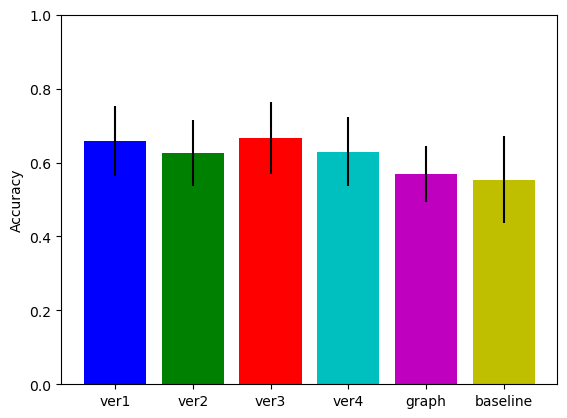

In [84]:
plt.bar(['ver1', 'ver2', 'ver3', 'ver4', 'graph', 'baseline'], accuracy_avg, yerr=accuracy_std, color=['b', 'g', 'r', 'c', 'm', 'y'])
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.savefig('activity_accuracy.png')

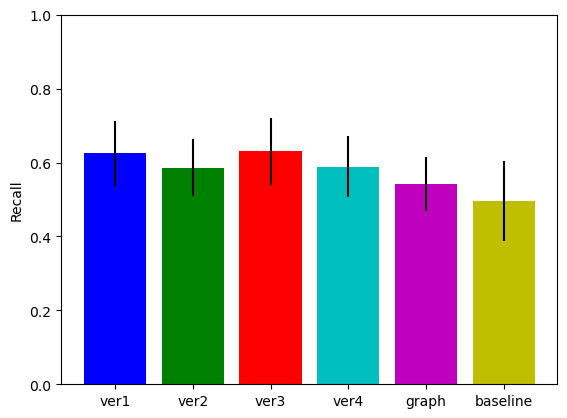

In [85]:
plt.bar(['ver1', 'ver2', 'ver3', 'ver4', 'graph', 'baseline'], recall_avg, yerr=recall_std, color=['b', 'g', 'r', 'c', 'm', 'y'])
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.savefig('activity_recall.png')

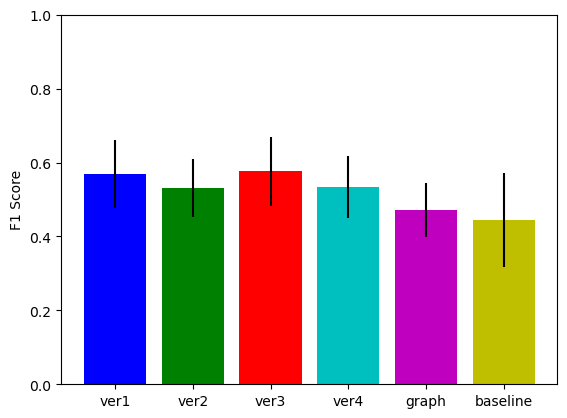

In [86]:
plt.bar(['ver1', 'ver2', 'ver3', 'ver4', 'graph', 'baseline'], f1_avg, yerr=f1_std, color=['b', 'g', 'r', 'c', 'm', 'y'])
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.savefig('activity_f1.png')